<h1>POSTTEST 5 Praktikum Kecerdasan Buatan<h1>

<h3>Nama  : Sarah Syifani<h3>
<h3>NIM   : 2109106131<h3>
<h3>Kelas : Informatika C2 2021<h3>

Import Libarary

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

Membaca Dataset

In [6]:
df_wines= pd.read_csv("wines_SPA.csv")
df_wines

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


<h3>A. Supervised Learning<h3>

A1. Linear Regression

In [15]:
df_wines
X = df_wines[['num_reviews']]
y = df_wines['rating']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=10
)#pisahkan data ke train dan test

In [29]:
model_reg = LinearRegression() #buat model
model_reg.fit(X_train, y_train) #latihan dgn train

##melakukan prediksi
y_pred = model_reg.predict(X_test) #lakukan ujian dengan test set

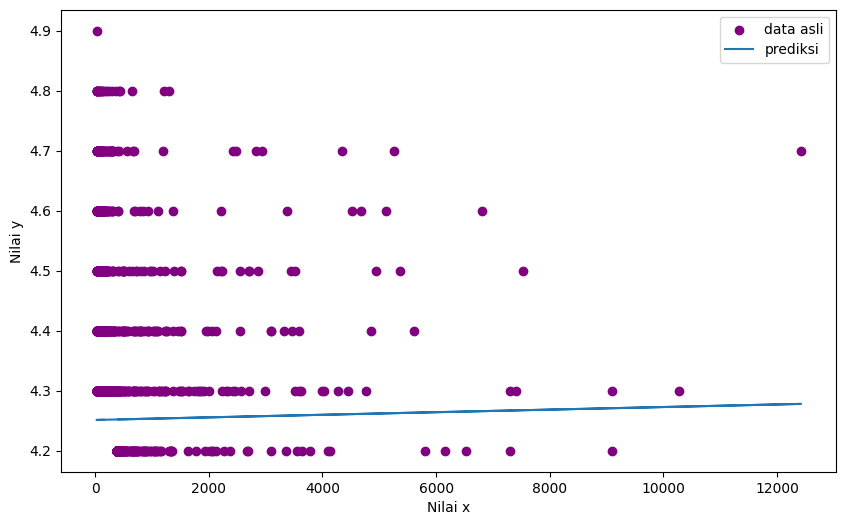

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color="purple", label='data asli')
plt.plot(X_test, y_pred, label='prediksi')
plt.xlabel("Nilai x")
plt.ylabel("Nilai y")
plt.legend()
plt.show()

A2. Evaluasi Regresi

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
##EVALUASI REGRESI, MAKIN DEKAT 0 MAKIN BAGUS
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" MAE : ", mae,'\n',"MSE : ", mse,'\n', "RMSE : ", rmse,'\n', "R2 : ", r2)

 MAE :  0.08357859178820816 
 MSE :  0.014739499264062306 
 RMSE :  0.1214063394722957 
 R2 :  -0.0017166543472393325


<h3>B. Unsupervised Learning<h3>

B1. Implementasi Metode K-Means

Menggunakan fitur X dan menentukan banyaknya kelompok

In [40]:
X = df_wines[["num_reviews", "rating"]]
K = 2

Inisialisasi K-Means dan melatih model K-Means berdasarkan data X

In [41]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

Membuat label kelompok dari model dan tambah kolom prediksi serta titik pusat kelompok dari model

In [42]:
cluster_labels = kmeans.labels_
df_wines["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

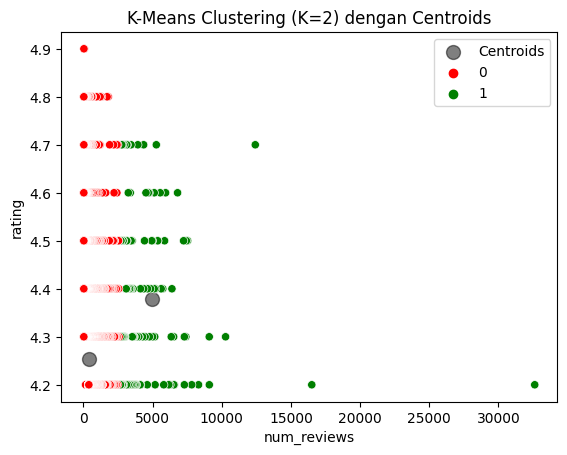

In [43]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df_wines, x="num_reviews", y="rating", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("num_reviews")
plt.ylabel("rating")
plt.legend()
plt.show()

Membuat crosstab untuk membandingkan cluster labels dengan true labels

In [46]:
cross_tab = pd.crosstab(df_wines["cluster"], df_wines["country"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
country  Espana
cluster        
0          7390
1           110 



Menghitung dan mencetak nilai "Adjusted Rand Index (ARI)" yang mengukur sejauh mana clustering dengan algoritma K-Means

In [47]:
ari = adjusted_rand_score(df_wines["country"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.00


Menghitung dan mencetak nilai "Normalized Mutual Information (NMI)" untuk mengevaluasi sejauh mana hasil clustering dengan algoritma K-Means

In [48]:
true_labels_num = df_wines["country"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.00


Homogeneity, Completeness dan V-Measure membantu mengukur sejauh mana hasil klustering sesuai dengan label asli data dan seberapa baik klustering tersebut dalam mengelompokkan data

In [51]:
homogeneity = homogeneity_score(df_wines["country"], cluster_labels)
completeness = completeness_score(df_wines["country"], cluster_labels)
v_measure = v_measure_score(df_wines["country"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 1.00
Completeness Score: 0.00
V-Measure Score: 0.00
